In [1]:
import gen_pre_data as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random
from test_rnn1 import test_network
from IPython.display import clear_output
import os
import datetime
import test_rnn_realtime as net
from test_rnn2 import test_network as test_network2
import traning as tr
from sklearn.decomposition import PCA
from sklearn import datasets

In [2]:
def make_smu(Wih, Whh, Who, bh,bo,I,H,O):
    input_data, target_data = gpd.make_input_3data(high_value, low_value, category_num, steps_num)
    import test_rnn_realtime as net
    from test_rnn2 import test_network
    test_net = net.test_network(I,H,O,1,1,1,3)
    test_net.set_Wandb(Wih, Whh, Who, bh, bo)
    itest_data = np.empty((0,1,H))
    itarget_data = np.empty((0,2))
    for i in range(input_data.shape[0]):
        test_num = i
        step_length = 100
        test_net.def_parameter(Tau, 0.01, 1, step_length)
        test_net.network_reset()
        memo = test_net.forward(input_data, target_data, i)
        test = np.round(test_net.output_H(), decimals=3)
        test = np.array([test])
        itest_data = np.vstack((itest_data, test))
        addtarget = target_data[test_num]
        itarget_data = np.vstack((itarget_data, addtarget))
    return itest_data, itarget_data, target_data

In [3]:
tar4 = np.array([3. ,0. ,0. ,0. ,2. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,3. ,0. ,0. ,0. ,2. ,2. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,3.])
tar3 = np.array([3. ,0. ,0. ,0. ,0. ,2. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,3. ,0. ,2. ,0. ,0. ,0. ,2. ,0. ,0. ,0. ,0. ,0. ,0. ,3.])

In [4]:
class one_tra:
    def __init__(self,Wih_size, Whh_size, Who_size):
        self.loss_memo = []
        self.Wih = Wih_size * np.random.rand(I,H) - Wih_size/2
        self.Whh = Whh_size * np.random.rand(H,H) - Whh_size/2
        self.Who = Who_size * np.random.rand(H,O) - Who_size/2 
        self.bh = np.zeros((1,H))
        self.bo = np.zeros((1,O))
        lr = 0.01
        optimizer_model = 0
        self.three_layer_network = test_network(I,H,O,Wih_size,Whh_size,Who_size,sequence_length,None)
        self.three_layer_network.setlr(lr,optimizer_model)
        self.three_layer_network.set_Wandb(self.Wih, self.Whh, self.Who, self.bh, self.bo)
        

    def tra(self, epochn = 1000):
        self.loss_memo = self.three_layer_network.traning(input_data,target_data,epochn)
        self.Wih, self.Whh, self.Who, self.bh, self.bo = self.three_layer_network.out_Wandb()
        
    def plt(self):
        plt.plot(self.loss_memo)

    def PCR(self):
        self.itest_data, self.itarget_data,self.target_data = make_smu(self.Wih, self.Whh, self.Who, self.bh, self.bo,I,H,O)
        dataset = datasets.load_iris()
        features = dataset.data
        targets = dataset.target
        data = self.itest_data.reshape(r**steps_num,H)
        target_data2 = np.delete(self.target_data, 1, 1)
        target_data3 = target_data2.reshape(r**steps_num,)
        pca = PCA(n_components=2)
        pca.fit(data)
        transformed = pca.fit_transform(data)
        for num_label in range(tar3.shape[0]):
            print("label", tar3[num_label])
            print(transformed[num_label])
            if(tar3[num_label] == 0):
                plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="gray", alpha = 0.2)
            elif(tar3[num_label] == 1):
                plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="blue")
            elif(tar3[num_label] == 2):
                plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="red")
            elif(tar3[num_label] == 3):
                plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="blue", alpha=1)
#             print(transformed[target_data3 == label, 0])
#             print(transformed[target_data3 == label, 1])
#             plt.scatter(transformed[target_data3 == label, 0],
#                         transformed[target_data3 == label, 1])
        plt.title('principal component')
        plt.xlabel('pc1')
        plt.ylabel('pc2')

        # 主成分の寄与率を出力する

            # グラフを表示する
        plt.savefig("png/0317{0}.png".format(i),dpi=300)
        plt.show()
        

    def PCR2(self, alpha):
        self.itest_data, self.itarget_data,self.target_data = make_smu(self.Wih, self.Whh, self.Who, self.bh, self.bo,I,H,O)
        dataset = datasets.load_iris()
        features = dataset.data
        targets = dataset.target
        data = self.itest_data.reshape(r**steps_num,H)
        target_data2 = np.delete(self.target_data, 1, 1)
        target_data3 = target_data2.reshape(r**steps_num,)
        pca = PCA(n_components=2)
        pca.fit(data)
        transformed = pca.fit_transform(data)
        for num_label in range(tar3.shape[0]):
            print("label", tar3[num_label])
            print(transformed[num_label])
            if(tar3[num_label] == 0):
                print("pass")
            elif(tar3[num_label] == 1):
                print("pass")
            elif(tar3[num_label] == 2):
                plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="red", alpha=alpha)
            elif(tar3[num_label] == 3):
                plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="blue", alpha=alpha)
#             print(transformed[target_data3 == label, 0])
#             print(transformed[target_data3 == label, 1])
#             plt.scatter(transformed[target_data3 == label, 0],
#                         transformed[target_data3 == label, 1])
        plt.title('principal component')
        plt.xlabel('pc1')
        plt.ylabel('pc2')

        # 主成分の寄与率を出力する
        
        return transformed

            # グラフを表示する
        

    def pri(self,n):
        print(self.itest_data[n])
        
    def priw(self):
        print(self.itest_data)

In [10]:
def print_pca(transformed, num):
    for num_label in range(tar3.shape[0]):
        print("label", tar3[num_label])
        print(transformed[num_label])
        if(tar3[num_label] == 0):
            plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="gray", alpha = 1)
        elif(tar3[num_label] == 1):
            plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="blue")
        elif(tar3[num_label] == 2):
            plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="red")
        elif(tar3[num_label] == 3):
            plt.scatter(transformed[num_label, 0],transformed[num_label, 1], c="blue", alpha=1)
#             print(transformed[target_data3 == label, 0])
#             print(transformed[target_data3 == label, 1])
#             plt.scatter(transformed[target_data3 == label, 0],
#                         transformed[target_data3 == label, 1])
    plt.title('principal component')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

    # 主成分の寄与率を出力する

        # グラフを表示する
    plt.show()

In [11]:
a = np.array([1. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,1. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,0. ,1.])

In [12]:
r = 3
i = 0
high_value = 1.0
low_value = 0.0
category_num = r
steps_num = 3
sequence_length = steps_num 
input_data, target_data = gpd.make_input_3data(high_value, low_value, category_num, steps_num)
Wih_size = 1
Whh_size = 1
Who_size = 3
I = category_num
H = 20
O = 2
input_data, target_data = gpd.iadd_traning_3data(input_data, target_data, category_num, steps_num)

non_much_num: 9
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
non_much_num: 18
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
non_much_num: 22
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
non_much_num: 4
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
non_much_num: 8
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
non_much_num: 17
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [13]:
pcr_test1 = one_tra(Wih_size, Whh_size, Who_size)

loss: [[ 0.50862581 -0.54152927]] epoch: 500
_________
out2: [[0.50862581 0.45847073]]
t: [[0. 1.]]
x: [[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
New_lr: 0.01025200208362594
_________
Clipping was done
loss: [[-0.55450225  0.57557141]] epoch: 1000
_________
out2: [[0.44549775 0.57557141]]
t: [[1. 0.]]
x: [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
New_lr: 0.009736837981928167
_________
Clipping was done
loss: [[-0.45879198  0.47684628]] epoch: 1500
_________
out2: [[0.54120802 0.47684628]]
t: [[1. 0.]]
x: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
New_lr: 0.01024434311331787
_________
Clipping was done
bo: [[-0.05036719 -0.03357985]]
test_number: 0
ix: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
targer: [[1. 0.]]
sequence_length 3
test_number: 1
ix: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
targer: [[0. 1.]]
sequence_length 3
test_number: 2
ix: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
targer: [[0. 1.]]
sequence_length 3
test_number: 3
ix: [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
targer: [[0. 1.]]
sequence_length 3
test_numb

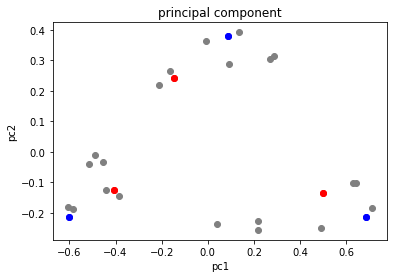

In [15]:
Tau = 70
pcr_test1.tra(2000)
result = pcr_test1.PCR2(0.85)
print_pca(result, 0.7)